In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import numpy as np
import matplotlib.pyplot as plt

import BanditProblems as bp

In [13]:
number_of_action = 1000
number_of_arms   = 100
train_func = bp.train_two_peak
bandit_algo = bp.gp_ucb
x = np.linspace(0, 1, number_of_arms)
y = train_func(x)[1]

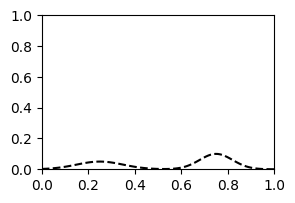

In [14]:
bp.plot_train_func(x,y)

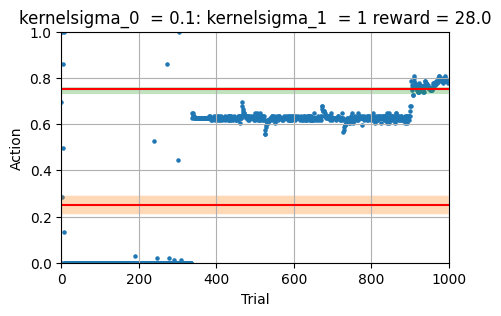

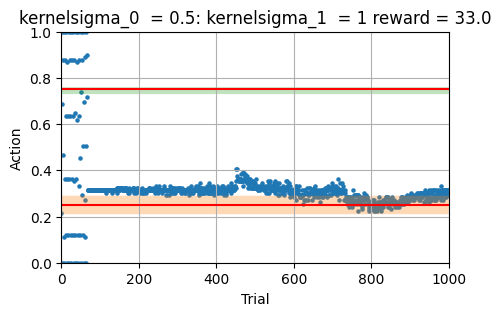

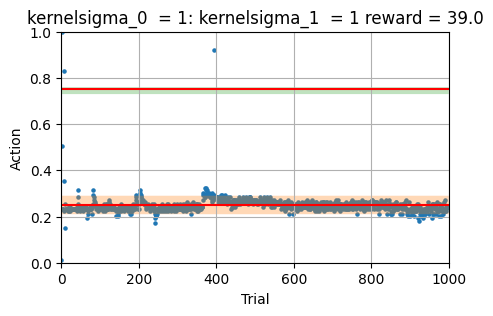

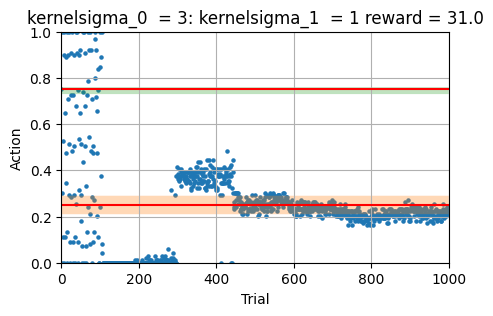

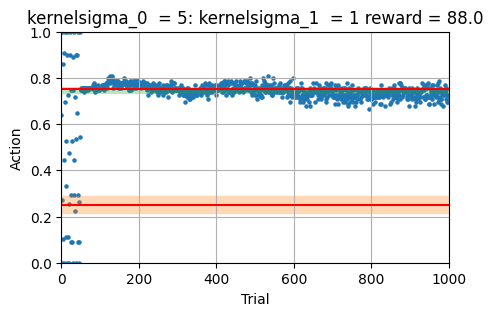

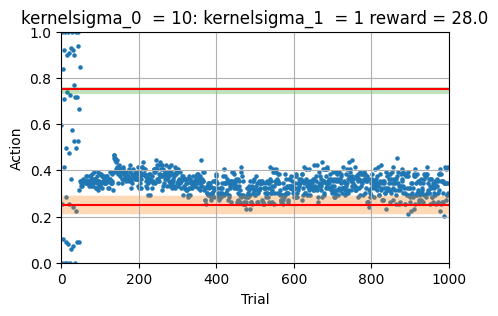

[[37. 75. 68. 52. 66. 70. 50. 18. 64. 28.]
 [67. 25. 32. 35.  3. 68. 84. 45. 42. 33.]
 [50. 97. 58. 11. 27. 81. 72. 92. 71. 39.]
 [63. 32. 81. 91. 80. 91. 56. 80. 45. 31.]
 [49. 45. 49. 34. 93. 79. 85. 99. 86. 88.]
 [91. 57. 34. 37. 99. 76. 35. 83. 77. 28.]]


In [15]:
kernel_sigma = [[0.1, 1], [0.5, 1], [1,1], [3,1], [5,1], [10, 1]]
train_area = {'mean' : 0.25, 'min' : 0.21, 'max' : 0.29},{'mean' : 0.75, 'min' : 0.73, 'max' : 0.76},
T = 10
total_rewards = np.array([])
for k in kernel_sigma:
    for i in range(T):
        y_train, x_train = bp.sim_GP(bandit_algo, number_of_action, train_func, x, bp.GP, is_gp_plot=False, kernel_sigma = k)    
        total_rewards = np.append(total_rewards, sum(y_train))
    title = f'kernelsigma_0  = {k[0]}: kernelsigma_1  = {k[1]} reward = {sum(y_train)}'
    bp.plot_transition_action(x_train, number_of_action, train_area, titel = title)
total_rewards = total_rewards.reshape(len(kernel_sigma), T)
print(total_rewards)

In [16]:
index = 0
t_r = total_rewards
for i in kernel_sigma:
    print(f'ave_reward = {np.mean(t_r[index])} max_r = {np.max(t_r[index])} min_r = {np.min(t_r[index])} var_r = "{round(np.sqrt(np.var(t_r[index])), 2)}" kernel_sigma_0 = "{i[0]}" kernel_sigma_0 = "{i[1]}"')
    index += 1

ave_reward = 52.8 max_r = 75.0 min_r = 18.0 var_r = "18.45" kernel_sigma_0 = "0.1" kernel_sigma_0 = "1"
ave_reward = 43.4 max_r = 84.0 min_r = 3.0 var_r = "22.57" kernel_sigma_0 = "0.5" kernel_sigma_0 = "1"
ave_reward = 59.8 max_r = 97.0 min_r = 11.0 var_r = "26.71" kernel_sigma_0 = "1" kernel_sigma_0 = "1"
ave_reward = 65.0 max_r = 91.0 min_r = 31.0 var_r = "21.88" kernel_sigma_0 = "3" kernel_sigma_0 = "1"
ave_reward = 70.7 max_r = 99.0 min_r = 34.0 var_r = "22.48" kernel_sigma_0 = "5" kernel_sigma_0 = "1"
ave_reward = 61.7 max_r = 99.0 min_r = 28.0 var_r = "25.28" kernel_sigma_0 = "10" kernel_sigma_0 = "1"


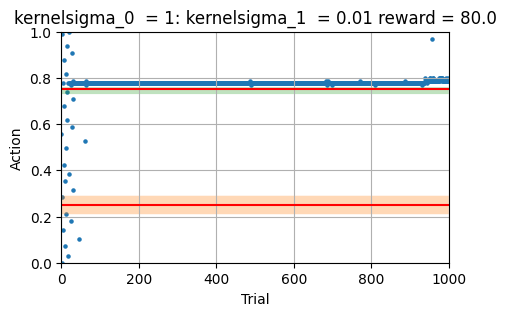

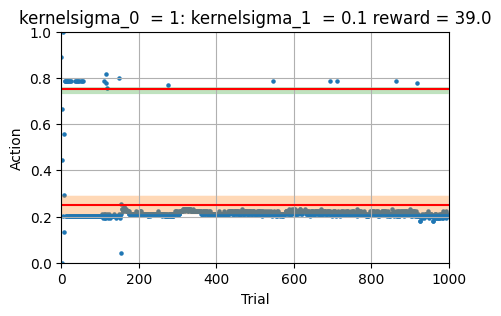

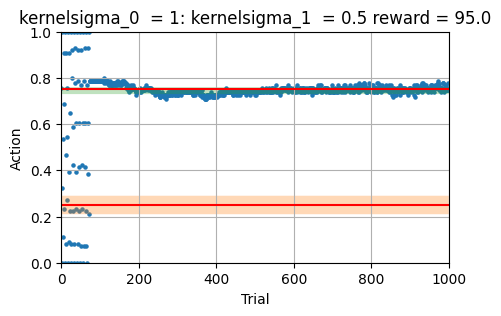

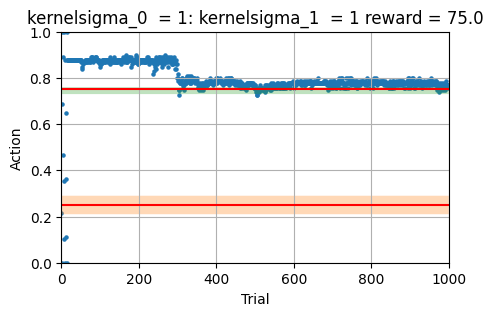

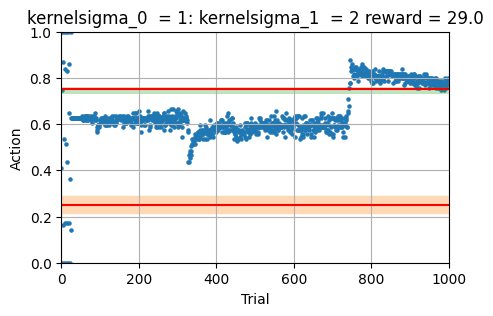

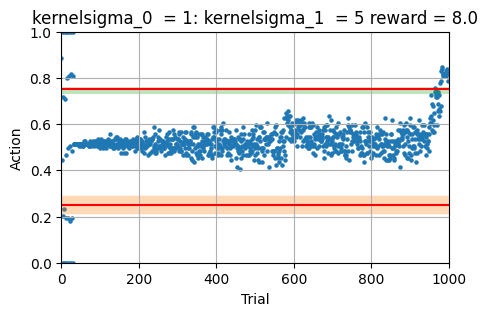

[[103. 100.  62. 103.  68.  35.  44. 102.  43.  80.]
 [ 57.  53.  21.  76.  96.  87.  97.  12.  42.  39.]
 [ 52.  90.  46.  39.  43.  95.  25.  72.  23.  95.]
 [ 19.  88.  88.  89.  30.  23.  25.  26.  90.  75.]
 [ 70.  55.  74.  28.  17.  46.  70.  38.  61.  29.]
 [ 96.  30.  88.  79.  54.  37.  61.  59.  97.   8.]]


In [17]:
kernel_sigma = [[1, 0.01], [1, 0.1], [1,0.5], [1,1], [1,2], [1, 5]]
train_area = {'mean' : 0.25, 'min' : 0.21, 'max' : 0.29},{'mean' : 0.75, 'min' : 0.73, 'max' : 0.76},
total_rewards = np.array([])
for k in kernel_sigma:
    for i in range(T):
        y_train, x_train = bp.sim_GP(bandit_algo, number_of_action, train_func, x, bp.GP, is_gp_plot=False, kernel_sigma = k)    
        total_rewards = np.append(total_rewards, sum(y_train))
    title = f'kernelsigma_0  = {k[0]}: kernelsigma_1  = {k[1]} reward = {sum(y_train)}'
    bp.plot_transition_action(x_train, number_of_action, train_area, titel = title)
total_rewards = total_rewards.reshape(len(kernel_sigma), T)
print(total_rewards)

In [18]:
index = 0
t_r = total_rewards
for i in kernel_sigma:
    print(f'ave_reward = {np.mean(t_r[index])} max_r = {np.max(t_r[index])} min_r = {np.min(t_r[index])} var_r = "{round(np.sqrt(np.var(t_r[index])), 2)}" kernel_sigma_0 = "{i[0]}" kernel_sigma_0 = "{i[1]}"')
    index += 1

ave_reward = 74.0 max_r = 103.0 min_r = 35.0 var_r = "25.96" kernel_sigma_0 = "1" kernel_sigma_0 = "0.01"
ave_reward = 58.0 max_r = 97.0 min_r = 12.0 var_r = "28.74" kernel_sigma_0 = "1" kernel_sigma_0 = "0.1"
ave_reward = 58.0 max_r = 95.0 min_r = 23.0 var_r = "26.53" kernel_sigma_0 = "1" kernel_sigma_0 = "0.5"
ave_reward = 55.3 max_r = 90.0 min_r = 19.0 var_r = "31.05" kernel_sigma_0 = "1" kernel_sigma_0 = "1"
ave_reward = 48.8 max_r = 74.0 min_r = 17.0 var_r = "19.19" kernel_sigma_0 = "1" kernel_sigma_0 = "2"
ave_reward = 60.9 max_r = 97.0 min_r = 8.0 var_r = "28.24" kernel_sigma_0 = "1" kernel_sigma_0 = "5"
